<h3 style="text-align:center"><em> Introduction to Solid State Physics: Computer Labs</em></h3>
<h1 style="text-align:center"> Vibrational properties of one-dimensional solids </h1>
<p style="text-align:center"><em>by Sébastien Lemal and Philippe Ghosez</em></p>

## I) Before we start...

### a) Purpose of the current lab

The objective of this session is to review the problem of harmonic vibrations in solids using a simple model: the 1-dimensional chain of atoms. In such a way, we retrains the number of degrees of freedom considerably while keeping a handful of significant physics. One-dimensional lattice can be as simple as the monoatomic chain of atoms, yet they can nevertheless becomes much more complex, with differents atoms (and interactions) within the Bravais lattice. Hence, even with simple 1D lattices, we often ends up with problems that cannot be solved easily. Moreover, letting the computer calculate the physical quantities and leaving humans performs more interesting tasks is a perfectly fine option.

<p>The current session deals with the following:
<ol>
    <li> A smaller reminder for the 1D monoatomic lattice</li>
    <li> Effects of second and third neighbours, and generalization</li>
    <li> The 1D diatomic lattice: solving the equations by diagonalization of the dynamical matrix</li>
    <li> The 1D triatomic lattice: witnessing the Brillouin zone folding using larger unit cells containing 3 atoms</li>
    <li> The 1D lattice: generalization for N atoms per unit cell: introduction to superlattices, and effects of point-defects</li>
</ol>
</p>

### b) Scripting with Python

For the sake of this session, we will run embedded Python scripts (<a href="https://www.python.org/">https://www.python.org/</a>). Python is an interpreted, high-level, general-purpose programming language which is quite popular amongst scientists, with its simple syntax and a large amount of libraries for scientific computing. Even if you are not familiar with Python, all the scripts below are already done, and the only thing you'll need to change is the value of some variables (used as parameters).


<p>Here are some comments about specific aspects of Python scripting:
<ul>
    <li> Some parameters will be stocked in arrays known as <i>lists</i> in Python, declared using <code>list_name = []</code>. For examples, the list of atoms of masses $M_i$ can be declared as <code>M = [1., 2.]</code>, which means that $M_1$ = 1 and $M_2$ = 2. Note that, similarly to C++, the index of arrays start at 0, meaning that <code>M[0] = 1</code>, <code>M[1] = 2</code>.</li>
    <li> We make use of the <a href="https://numpy.org/">NumPy</a> and <a href="https://www.scipy.org/">SciPy</a> libraries, providing useful functionalities for array manipulations and linear algebra applications. The results are plotted using the <a href="https://matplotlib.org/">MatPlotLib</a> library. These do not come with Python, yet have been installed on the server running this notebook.</li>
    <li> The scripts can be executed using Ctrl+Enter.</li>
    <li> As Python is interpreted, it may take some time before the results display. You can eventually tune the setting to limit the number of calculations, like tuning the number of k point where the dynamical matrix is diagonalized.</li>
</p>

## II) A small reminder: the 1D monoatomic lattice
We start by a small reminder about the vibrational properties of a 1D monoatomic lattice with atoms of mass $M$, linked between first neighbours with a stiffness constant $C$.

<img src="monoatomic_1D_lattice.svg" style="width: 50pc;"/>

The force applied to a single atom in cell $s$ is such as:

$$M\ddot u_s = C (u_{s-1} - u_{s})+ C(u_{s+1} - u_{s})$$
$$\Leftrightarrow M\ddot u_s = C (u_{s-1} + u_{s+1} - 2\:u_{s})$$

with atomic displacement

$$u_s = ue^{i(kx_s-\omega t)} = ue^{i(ksa-\omega t)}$$

where k is the wavevector ($k = 2\pi/\lambda$) and $\omega = 2\pi\nu$ the pulsation (frequency).

Injecting this solution in the equation of motion leads to

$$-M\omega^2u = C(e^{ika}+e^{-ika} -2)u$$

so that

$$\omega(k) = \sqrt{\frac{4C}{M}}\left|{\rm sin}{\left(\frac{ka}{2}\right)}\right|$$

which is the dispersion curve for the longitudinal vibration modes.

<img src="./Figures/monoatomic_vibrations.svg" style="width: 40pc;"/>


# Applications

## Effects beyond nearest neighbours

In the precedent example, we only considered interaction between nearest neighbours. What if we consider interaction beyond, for example with 2nd neighbours?

<img src="monoatomic_1D_lattice_2nd_NN.svg" style="width: 50pc;"/>

The effects of second neighbours is easy to consider: we need to add the corresponding terms in the equation of motion:

$$M\ddot u_s = C_{1} (u_{s-1} - u_{s})+ C_{1}(u_{s+1} - u_{s}) + C_{2} (u_{s-2} - u_{s})+ C_{2}(u_{s+2} - u_{s})$$

leading to 

$$\omega(k) = \sqrt{\frac{1}{M}\left(4 C_1{\rm sin^2}{\left(\frac{ka}{2}\right)} + 4 C_2{\rm sin^2}{\left(ka\right)} \right)}$$

What about considering interactions up to to the 3rd neighbours ? Or the N-th neighbours ? The generalization is straightforward and exercises based on its analytic formulation are proposed in this course.

In the following script, we set a monoatomic 1D lattice with different configurations for the force constants ($C_1$ and $C_2$ sets). For $C_1$, we set the values [5, 0, 0], corresponding for the case where only the interactions between nearest neighbours are accounted (with $C$ = 5). For $C_2$, you may change the values to account the for second and third neighbours, for example [5, 2, 1]. 

### <span style="color: #0000ff;">Exercises and questions</span>

<p><span style="color: #0000ff;">Using the script below, try to answer these questions:
<ol><span style="color: #0000ff;">
<li>Consider interactions up to the 2nd nearest neighbours. In which region(s) of the Brillouin zone do theses interactions have the largest effect ?</li>
<li>Consider interactions up to the 2nd nearest neighbours. What happens when the force constant between second neighbours has an opposite sign compare to the force constant between nearest neighbours ? Discuss.</li>
<li>Now add interactions between 3rd nearest neighbours. In which region(s) of the Brillouin zone do theses interactions have the largest effect ?</li>
<li>Set $C_1$ = 5, $C_2$ = $-C_1/4$ and $C_3$ = $C_1/4$. Describe what is happening.</li>
</span></ol>
</span> </p>

Calculating the DOS...
Integrated DOS = 1.00



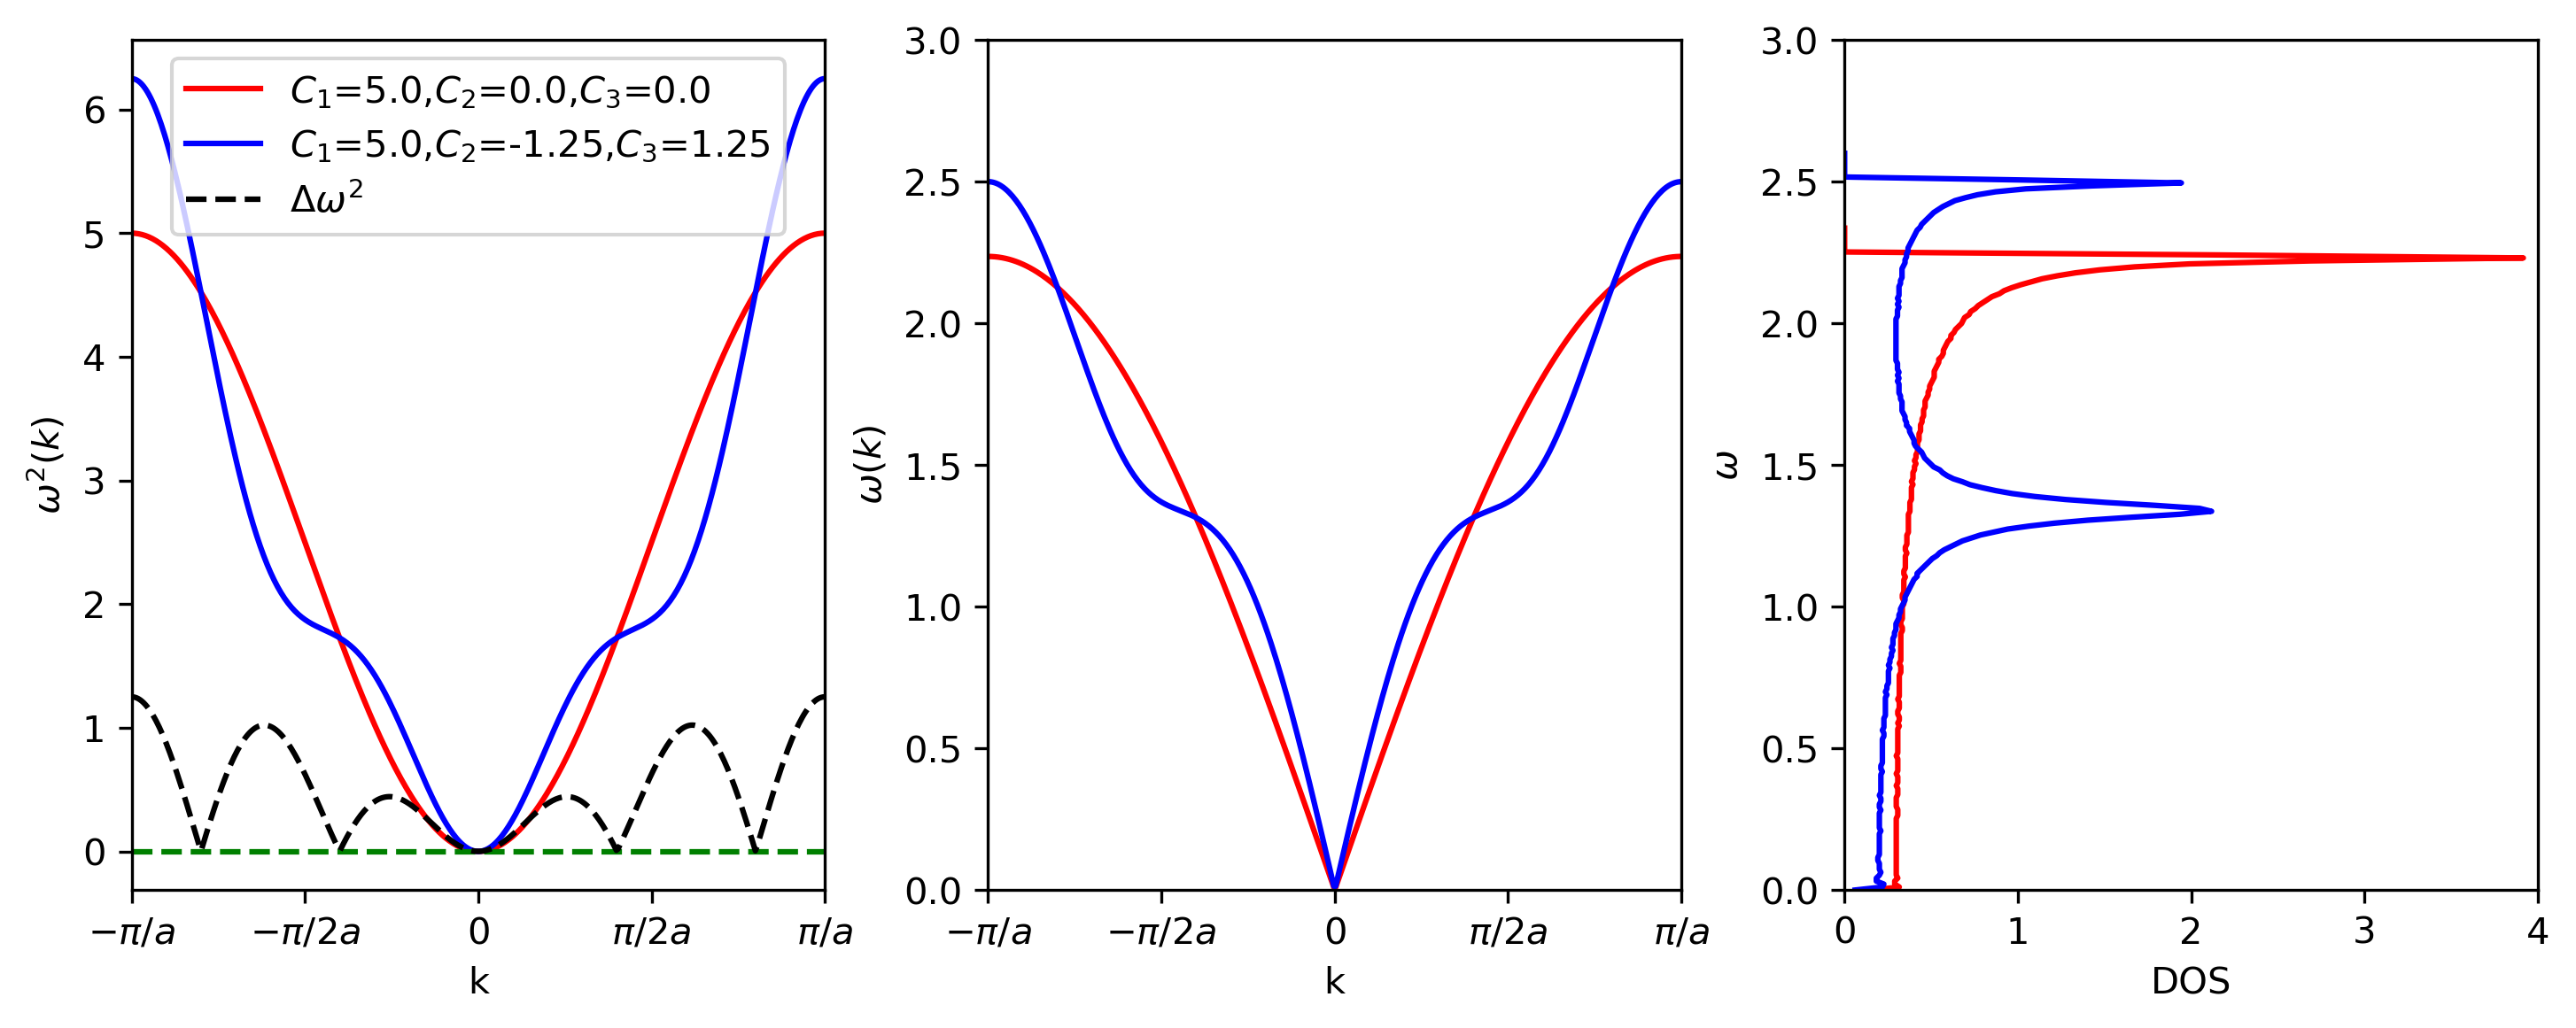

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from scipy import interpolate
import scipy.integrate as integrate
from numpy import linalg as LA
from pylab import *

# set parameters

a = 1. # cell parameter
M = [4.] # set M1 and M2

C1 = [5.,0.,0.]  # preset forces constants, in order C1, C2, C3, ...
C2 = [5.,-5./4,5./4]

C = C1 # Initialize force constants to the C1 configuration

number_of_atoms = len(M) # number of atoms
N =  len(C) # number of terms = number of force constants

def omega2(k):
    # Next we define the dynamic matrix accounting for all set interactions. 
    # The returned value is the squared frequency.
    ssum = (1/M[0])*(4*C[0]*(np.sin(k*a/2)**2))
    sqrtsum = 0.
    for i in range(N):
        if i >0:
            ssum = ssum+(1/M[0])*(4*C[i]*(np.sin((i+1)*k*a/2)**2))
    return (ssum) # return the square of frequency at a given k-point 

def dos_w(solution,N):
    # For each frequencies w, we integrate the number of state between w-dw and w+dw
    # Only the solution within the Brillouin zone must be provided
    solution_list = list(flatten(solution))

    dw = 1e-2
    nw = int(max(solution_list)/dw)
    w_space = np.linspace(0,max(solution_list)+0.1,nw)
    w_dos = []

    for w in w_space:
        wsum = 0.
        for i in solution_list:
            if i > w-dw and i < w+dw:
                wsum = wsum + 1
        w_dos.append(wsum) 

    # Normalize the DOS so that the integral is N (number of atoms in the cell)
    w_sum = sum(w_dos)*dw
    w_dos = w_dos/(w_sum/N)
    w_sum = sum(w_dos)*dw
    
    return w_space,w_dos,w_sum

# Number of k-points
nk = 400

# Building a mesh in k-space to solve the dynamical matrix
kmesh = np.linspace(-np.pi/a,np.pi/a,nk)
large_kmesh = np.linspace(-np.pi/a,np.pi/a,nk*30)
            
# Stocking the solutions, extrapolating the solutions, computing the DOS
C = C1
wsquare1 = omega2(kmesh)
dispersion1 = np.sqrt(omega2(kmesh))
exp_dispersion1 = interpolate.InterpolatedUnivariateSpline(kmesh, dispersion1)
max_w1 = max(list(flatten(dispersion1)))
dos1 = [dos_w(exp_dispersion1(large_kmesh),number_of_atoms)[0],\
        dos_w(exp_dispersion1(large_kmesh),number_of_atoms)[1],\
        dos_w(exp_dispersion1(large_kmesh),number_of_atoms)[2]]

C = C2
wsquare2 = omega2(kmesh)
dispersion2 = np.sqrt(omega2(kmesh))
exp_dispersion2 = interpolate.InterpolatedUnivariateSpline(kmesh, dispersion2)
solution_list2 = list(flatten(dispersion2)) # The solution is flattened
max_w2 = max(solution_list2)
print('Calculating the DOS...')
dos2 = [dos_w(exp_dispersion2(large_kmesh),number_of_atoms)[0],\
        dos_w(exp_dispersion2(large_kmesh),number_of_atoms)[1],\
        dos_w(exp_dispersion2(large_kmesh),number_of_atoms)[2]]           

print('Integrated DOS = ' + '%.2f'%(dos2[2]))

# Plotting the results

plt.figure(figsize=(12, 4), dpi=300)

# Eigenvalues
plt.subplot(1,3,1,adjustable='datalim')
C = C1
plt.plot(kmesh, wsquare1,'r',\
         label='$C_1$=' + str(C[0]) + ',$C_2$=' + str(C[1]) + ',$C_3$=' + str(C[2]))
C = C2
plt.plot(kmesh, wsquare2,'b',\
         label='$C_1$=' + str(C[0]) + ',$C_2$=' + str(C[1]) + ',$C_3$=' + str(C[2]))
plt.plot(kmesh, kmesh*0,'g--')
plt.plot(kmesh, abs(wsquare1-wsquare2),'k--', label='$\Delta\omega^2$')
plt.xlabel(r'k')
plt.xlim(-np.pi/a,np.pi/a)
plt.xticks([-np.pi/a,-np.pi/(2*a),0,np.pi/(2*a),np.pi/a],\
           ['$-\pi/a$','$-\pi/2a$','$0$','$\pi/2a$', '$\pi/a$'])
plt.ylabel(r'$\omega^2 (k)$')
plt.legend(loc='best')


# Frequencies
plt.subplot(1,3,2,adjustable='datalim')
plt.ylabel(r'$\omega (k)$')

C=C1
plt.plot(kmesh, dispersion1,'r',\
         label='$C_1$=' + str(C[0]) + ',$C_2$=' + str(C[1]) + ',$C_3$=' + str(C[2]))
C=C2
plt.plot(kmesh, dispersion2,'b',\
         label='$C_1$=' + str(C[0]) + ',$C_2$=' + str(C[1]) + ',$C_3$=' + str(C[2]))

plt.xlabel(r'k')
plt.xlim(-np.pi/a,np.pi/a)
plt.xticks([-np.pi/a,-np.pi/(2*a),0,np.pi/(2*a),np.pi/a],\
           ['$-\pi/a$','$-\pi/2a$','$0$','$\pi/2a$', '$\pi/a$'])
plt.ylim(0,max_w2+0.5)

# Density of state
plt.subplot(1,3,3,adjustable='datalim')
plt.plot(dos1[1], dos1[0],'r') # linewidth=2
plt.plot(dos2[1], dos2[0],'b')
plt.xlabel(r'DOS')
plt.xlim(0,4)
plt.ylim(0,max_w2+0.5)
plt.ylabel(r'$\omega$')
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
plt.savefig("1D_atomic_chain_with_interaction_beyond_NN.pdf")

print ('')

##  A one-dimensional lattice with 2-atoms unit cell

Let us consider a 1D lattice with a 2-atoms pattern, as follows:

<img src="diatomic_1D_lattice.svg" style="width: 50pc;"/>

We consider two atoms with masses $M_1$ and $M_2$, bonded through force constants $C_1$ and $C_2$. Thus, the interactions are limited between nearest neighbours.
The equations of motion for the atoms in cell $s$ are:

$$\begin{cases}
M_1\ddot u_s = C_{2} (v_{s-1} - u_{s})+ C_{1}(v_{s} - u_{s})\\
M_2\ddot v_s = C_{2} (u_{s+1} - v_{s})+ C_{1}(u_{s} - v_{s})
\end{cases}$$

Using the <i>ansatz</i> $\displaystyle u_s = u\:e^{i(ksa -\omega t)}$, $\displaystyle v_s = v\:e^{i(ksa -\omega t)}$, we have the following equations:

$$\begin{array}{lcl} 
0 & = &\left[C_1 + C_2 - M_1\omega^2 \right]u - \left[C_1 + C_2\: e^{-ika}\right]v \\
0 & = & -\left[C_1 + C_2\: e^{ika}\right]u + \left[C_1 + C_2 - M_2\omega^2 \right]v \end{array}$$

This system of equation admits solutions if:

$$\displaystyle
\begin{vmatrix}
C_1 + C_2 - M_1\omega^2 & -[C_1 + C_2\: e^{-ika}]\\
-[C_1 + C_2\: e^{ika}] & C_1 + C_2 - M_2\omega^2
\end{vmatrix} = 0$$

Calculating the determinant of this matrix and finding the roots leads to the solution $\omega_i(k)$.

Another way is to rewrite the equations as:

$$\displaystyle
\begin{pmatrix}
\displaystyle \frac{1}{M_1}(C_1 + C_2) &\displaystyle -\frac{1}{M_1}[C_1 + C_2\: e^{-ika}]\\
\displaystyle-\frac{1}{M_2}[C_1 + C_2\: e^{ika}] &\displaystyle \frac{1}{M_2}(C_1 + C_2)
\end{pmatrix}
\begin{pmatrix}
u\\
v
\end{pmatrix}= \omega^2
\begin{pmatrix}
u\\
v
\end{pmatrix}$$

$$\Longleftrightarrow \tilde{\mathbf{D}}\cdot\mathbf{U} = \omega^2 \mathbf{U}$$

This is a basic eigenvalues problem: the matrix $\tilde{\mathbf{D}}$ is called dynamical matrix, and its eigenvalues corresponds to the frequencies $\omega_i(k)$, whereas the eigenvectors $\mathbf{U} = (u,v)$ are the associated displacements.

Hence, diagonalizing the dynamical matrix is all one need to do in order to get the solutions $\omega_i(k)$. In the case of the diatomic lattice, it is straightforward to do so. For more complex lattice however, it is often impossible to obtain analytical results, hence the necessity to solve the problem numerically. In this lab, we choose this option.
The following script performs such a diagonalization over several k-points in order to get the dispersion curves. The script is divided into several part:

<ol>
<li>First, we set the parameters ($M_1$, $M_2$, $C_1$, $C_2$, and the lattice parameter $a$)</li>
<li>We then define two functions: one returns the dynamical matrix for a given wave number $k$ (<code>dyn_mat_2at(k)</code>), whereas the other return the density of state (DOS) for the solutions $\omega_i(k)$ (<code>dos_w(solution,N)</code>)</li>
    <li>Then, we solve the problem using a linear algebra module to diagonalize the dynamical matrix over all the k-points in our mesh (using <code>LA.eigvals(dyn_mat_2at(k))</code>), and we also compute the DOS associated to these results.</li>
<li>Finally, these results are plotted using the <code>matplotlib</code> library.</li>
</ol>

### <span style="color: #0000ff;">Exercises and questions</span>

<p><span style="color: #0000ff;">Using the script below, try to answer these questions:</span> </p>
<ol><span style="color: #0000ff;">
<li>Set $C_1$ = $C_2$ = 5, $M_1$ = $M_2$ = 3. What do you get ?</li>
<li>Change $C_2$ and $M_2$. What is happening ? Describe the density of state.</li>
<li>Identify the acoustic and optic branches.</li>
<li>Now, try to adapt the script below so that interactions up to the second nearest neighbours are accounted. What is the associated dynamical matrix ? Emphasize the effects from the second nearest neighbours and plot what you get.</li>
</span></ol>
</span> </p>

2 atoms in the cell -> 2 bands along k.

M = [2.0, 4.0]
C = [1.0, 2.0]
Dynamical matrix at Gamma (k = 0):
[[ 1.5       +0.j -1.06066017+0.j]
 [-1.06066017+0.j  0.75      +0.j]]

The corresponding eigenvalues w^2 are:
[1.11022302e-16 2.25000000e+00]

The corresponding eigenvectors are:
[[-0.57735027-0.j -0.81649658+0.j]
 [-0.81649658-0.j  0.57735027+0.j]]


Calculating the DOS...
Integrated DOS = 2.00



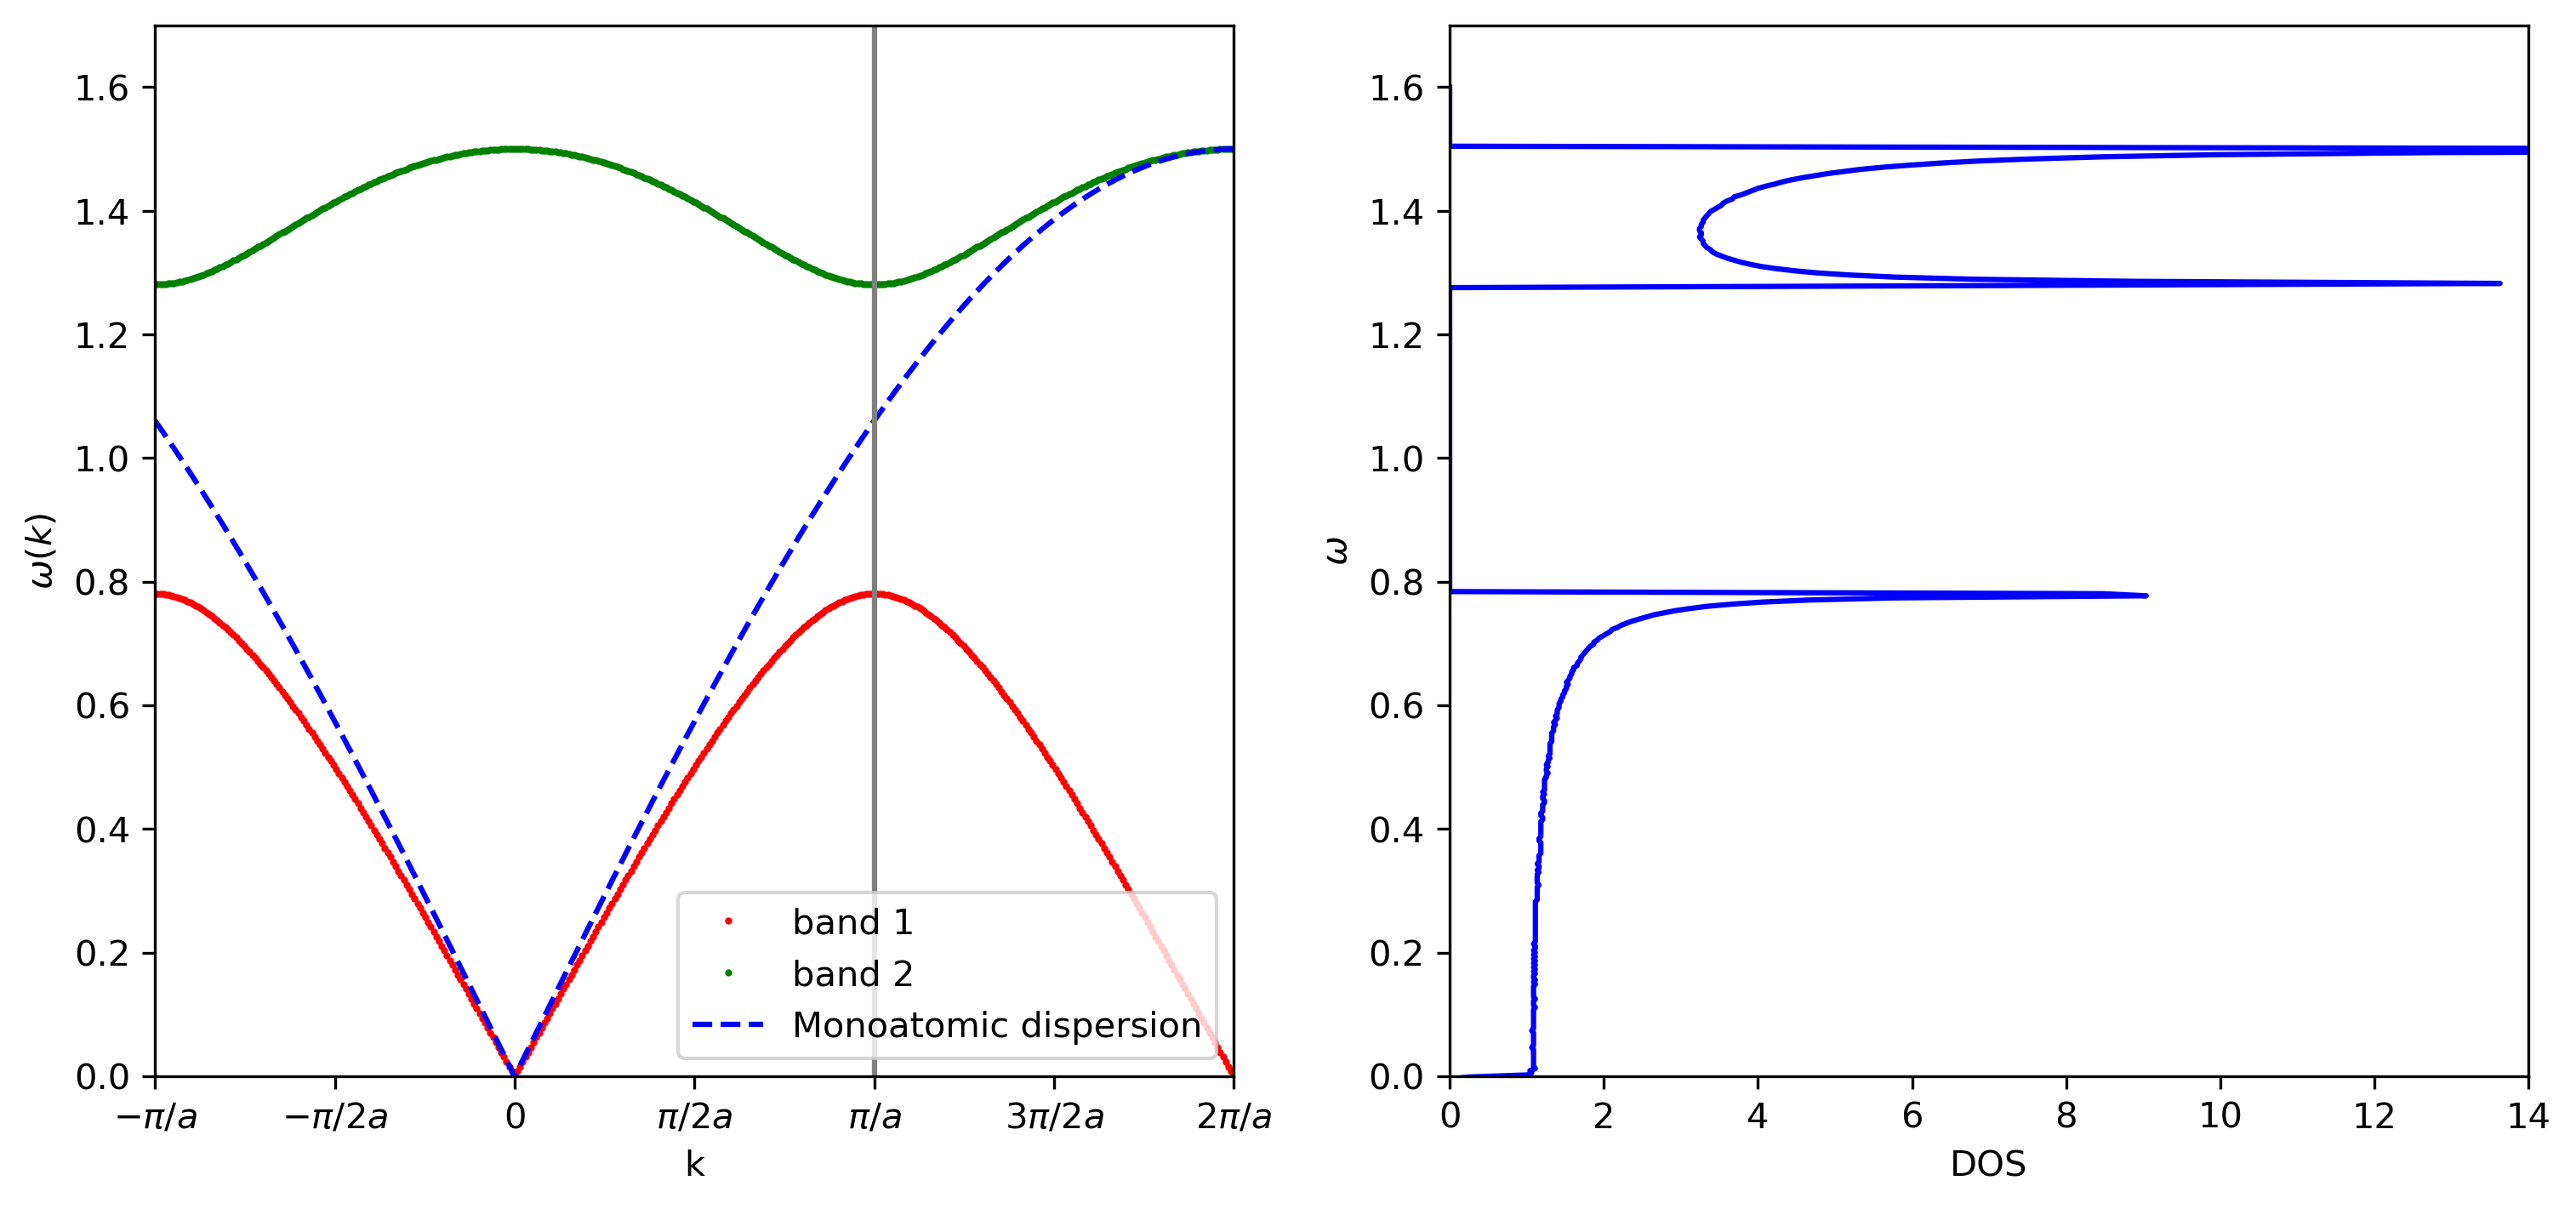

In [15]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize.nonlin import BroydenFirst, KrylovJacobian
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from numpy import linalg as LA
from pylab import *

########################################
#                                      #
#        Part 1: set parameters        #
#                                      #
########################################

M = [2.,4.] # set M1 and M2
C = [1.,2.] # set C1 and C2
a = 1. # cell parameter
N = len(M) 

print (str(N) + " atoms in the cell -> 2 bands along k." + '\n')
print ('M = ' + str(M) + '\n' + 'C = ' + str(C) + '\n')

########################################
#                                      #
#      Part 2: functions returning     #
#   the dynamical matrix and the DOS   #
#                                      #
########################################

def dyn_mat_2at(k):
    return np.array([[(C[0]+C[1])/M[0], (-1/np.sqrt(M[0]*M[1]))*(C[0] + C[1]*np.exp(-1.j*k*a))],\
                     [(-1/np.sqrt(M[0]*M[1]))*(C[0] + C[1]*np.exp(1.j*k*a)), (C[0]+C[1])/M[1]]],\
                    dtype=complex)

def dos_w(solution,N):
    # For each frequencies w of a given solution (eigenvalues), 
    # we integrate the number of state between w-dw and w+dw
    # Only the solution within the Brillouin zone must be provided
    solution_list = list(flatten(solution))

    dw = 3e-3
    nw = int(max(solution_list)/dw)
    w_space = np.linspace(-0.1,max(solution_list)+0.1,nw)
    w_dos = []

    for w in w_space:
        wsum = 0.
        for i in solution_list:
            if i > w-dw and i < w+dw:
                wsum = wsum + 1
        w_dos.append(wsum)  
        
    # Normalize the DOS so that the integral over the Brillouin zone is N !
    w_sum = sum(w_dos)*dw
    w_dos = (w_dos/(w_sum/N))
    w_sum = sum(w_dos)*dw

    return w_space,w_dos,w_sum

print ('Dynamical matrix at Gamma (k = 0):')
print (dyn_mat_2at(0))
print ('\nThe corresponding eigenvalues w^2 are:')
print (LA.eigh(dyn_mat_2at(0))[0])
print ('\nThe corresponding eigenvectors are:')
print (LA.eigh(dyn_mat_2at(0))[1])
print ('\n')


########################################
#                                      #
#      Part 3: diagonalizing the       #
#   dynamical matrix on a mesh in      #
#    k-space and computing the DOS     #
#  using the eigenvalues restricted to #
#      the first Brillouin zone        #
#                                      #
########################################

nk = 400 # Number of k-points

kmesh = np.linspace(-1*np.pi,2*np.pi,nk) # Building a k-mesh in k-space to solve the dynamical matrix

# building the array where the solutions will be stocked
# Due to numerical accurary issues, some solutions at a given k-point will be "Not a number" (NaN).
# These are rejected, and we use the k-points without any pathologies for the mesh.

eigenvalues = []
eigenvectors = []
kokay = [] 
for i in range(N):
    eigenvalues.append([])
    eigenvectors.append([])
    kokay.append([])
    
#Diagonalization of the dynamical matrix for each k points. 
#The number of solutions is equal to N for a 1D system.
#We only take the positive roots.

for i in range(N):
    for k in kmesh:
        n = LA.eigh(dyn_mat_2at(k))
        if np.real(n[0][i]) > 0:  
            eigenvalues[i].append(np.sqrt(np.real(n[0][i])))
            eigenvectors[i].append((np.real((n[1]))))
            kokay[i].append(k)

# Calculation the DOS: the previous step are performed again, only within the Brillouin zone

print('Calculating the DOS...')

ibz = np.linspace(-np.pi/a,np.pi/a,nk)
large_ibz = np.linspace(-np.pi/a,np.pi/a,nk*40)
eigenvalues_ibz = [] 
kokay_ibz = []    # 
for i in range(N):
    eigenvalues_ibz.append([])
    kokay_ibz.append([])

for i in range(N):
    for k in ibz:
        n = LA.eigvalsh(dyn_mat_2at(k))
        if np.real(n[i]) > 0:  
            eigenvalues_ibz[i].append(np.sqrt(np.real(n[i])))
            kokay_ibz[i].append(k)

# We expand the solution to more k-points by interpolation
exp_eigenvalues_ibz = eigenvalues_ibz
for i in range(N):
    s = interpolate.InterpolatedUnivariateSpline(kokay_ibz[i], eigenvalues_ibz[i])
    exp_eigenvalues_ibz[i] = s(large_ibz)

max_w = max(list(flatten(eigenvalues_ibz)))
      
results_dos = [dos_w(exp_eigenvalues_ibz,N)[0],\
               dos_w(exp_eigenvalues_ibz,N)[1],\
               dos_w(exp_eigenvalues_ibz,N)[2]]

print('Integrated DOS = ' + '%.2f'%(results_dos[2]))

########################################
#                                      #
#     Part 4: Plotting the results     #
#                                      #
########################################

plt.figure(figsize=(12, 12), dpi=300) 
plt.subplot(2,2,1,adjustable='datalim')

plt.plot(kokay[0],eigenvalues[0],'ro',ms=1., label='band ' + str(1))
plt.plot(kokay[1],eigenvalues[1],'go',ms=1., label='band ' + str(2))
plt.plot(kmesh,np.sqrt((C[0]+C[1])*(M[0]+M[1])/(M[0]*M[1]))*abs(np.sin(kmesh*a/4)),\
         'b--',label='Monoatomic dispersion')
    
plt.xlabel(r'k')
plt.xticks([-np.pi/a,-np.pi/(2*a),0,np.pi/(2*a),np.pi/a, (1.5)*np.pi/a, 2*np.pi/a],\
           ['$-\pi/a$','$-\pi/2a$','$0$','$\pi/2a$', '$\pi/a$', '$3\pi/2a$', '$2\pi/a$'])
plt.xlim(-np.pi/a,2*np.pi/a)
plt.axvline(x=np.pi/a, c='gray')
plt.ylabel(r'$\omega (k)$')
plt.ylim(0,max_w+0.2)
plt.legend(loc='best')

plt.subplot(2,2,2,adjustable='datalim')
plt.xlabel(r'DOS')
plt.ylabel(r'$\omega$')
plt.ylim(0,max_w+0.2)
plt.xlim(0,14)
#plt.fill_between(w_dos, w_space, w_dos)
plt.plot(results_dos[1], results_dos[0], 'b', ms= 0.5)
#plt.subplot(2,2,3,adjustable='datalim')
#plt.plot(kokay[0], tmp1, 'r', ms= 0.5)
plt.savefig("1D_diatomic_chain_vibrations.pdf")

print ('')

## The one-dimensional lattice with a 3-atoms unit cell

We will now work on a slightly more complex model, which is the triatomic 1D lattice. In the unit cell, there are 3 atoms of mass $M_1$, $M_2$ and $M_3$, which are bonded through force constants $C_1$, $C_2$ and $C_3$.

$$\begin{cases}\displaystyle
M_1\ddot u_s = C_{3} (z_{s-1} - u_{s})+ C_{1}(v_{s} - u_{s})\\
M_2\ddot v_s = C_{2} (z_{s} - v_{s})+ C_{1}(u_{s} - v_{s})\\
M_3\ddot z_s = C_{3} (u_{s+1} - z_{s})+ C_{2}(v_{s} - z_{s})
\end{cases}$$

Using the usual ansatz for the displacements, we get the eigenvalues problems:

$$\tilde{\mathbf{D}}\cdot \mathbf{U} = \omega^2 \mathbf{U}$$

where $\mathbf{U} = (u,v,z)$ and 

$$\displaystyle \tilde{\mathbf{D}} = 
\begin{pmatrix}
\displaystyle\frac{C_{1}+C_{3}}{\sqrt{M_1}\sqrt{M_1}} &\displaystyle \frac{-C_{1}}{\sqrt{M_1}\sqrt{M_2}} &\displaystyle \frac{-C_{3}e^{-ika}}{\sqrt{M_1}\sqrt{M_3}}\\
\displaystyle \frac{-C_{1}}{\sqrt{M_2}\sqrt{M_1}} &\displaystyle \frac{C_{1}+C_{2}}{\sqrt{M_2}\sqrt{M_2}} &\displaystyle \frac{-C_{2}}{\sqrt{M_2}\sqrt{M_3}}\\
\displaystyle\frac{-C_{3}e^{ika}}{\sqrt{M_3}\sqrt{M_1}} &\displaystyle \frac{-C_{2}}{\sqrt{M_3}\sqrt{M_2}} &\displaystyle \frac{C_{2}+C_{3}}{\sqrt{M_3}\sqrt{M_3}}
\end{pmatrix}$$



### <span style="color: #0000ff;">Exercises and questions</span>

<p><span style="color: #0000ff;">Using the script below, try to answer these questions:</span> </p>

<ol><span style="color: #0000ff;">
<li>Set $C_1$ = $C_2$  = $C_3$ = 1, and $M_1$ = $M_2$ = $M_3$ = 1. What do you get ?</li>
<li>Set $C_3$ = 2. What do you get ?</li>
</span></ol>

M = [1.0, 1.0, 2.0]
C = [1.0, 1.0, 1.0]

Dynamical matrix at Gamma (k = 0):
[[ 2.        +0.j -1.        +0.j -0.70710678+0.j]
 [-1.        +0.j  2.        +0.j -0.70710678+0.j]
 [-0.70710678+0.j -0.70710678+0.j  1.        +0.j]]

The corresponding eigenvalues w^2 are:
[[-5.00000000e-01+0.j  5.00000000e-01-0.j  7.07106781e-01+0.j]
 [-5.00000000e-01+0.j  5.00000000e-01+0.j -7.07106781e-01+0.j]
 [-7.07106781e-01+0.j -7.07106781e-01+0.j  1.11022302e-16+0.j]]


Calculating the DOS...
Integrated DOS = 3.00



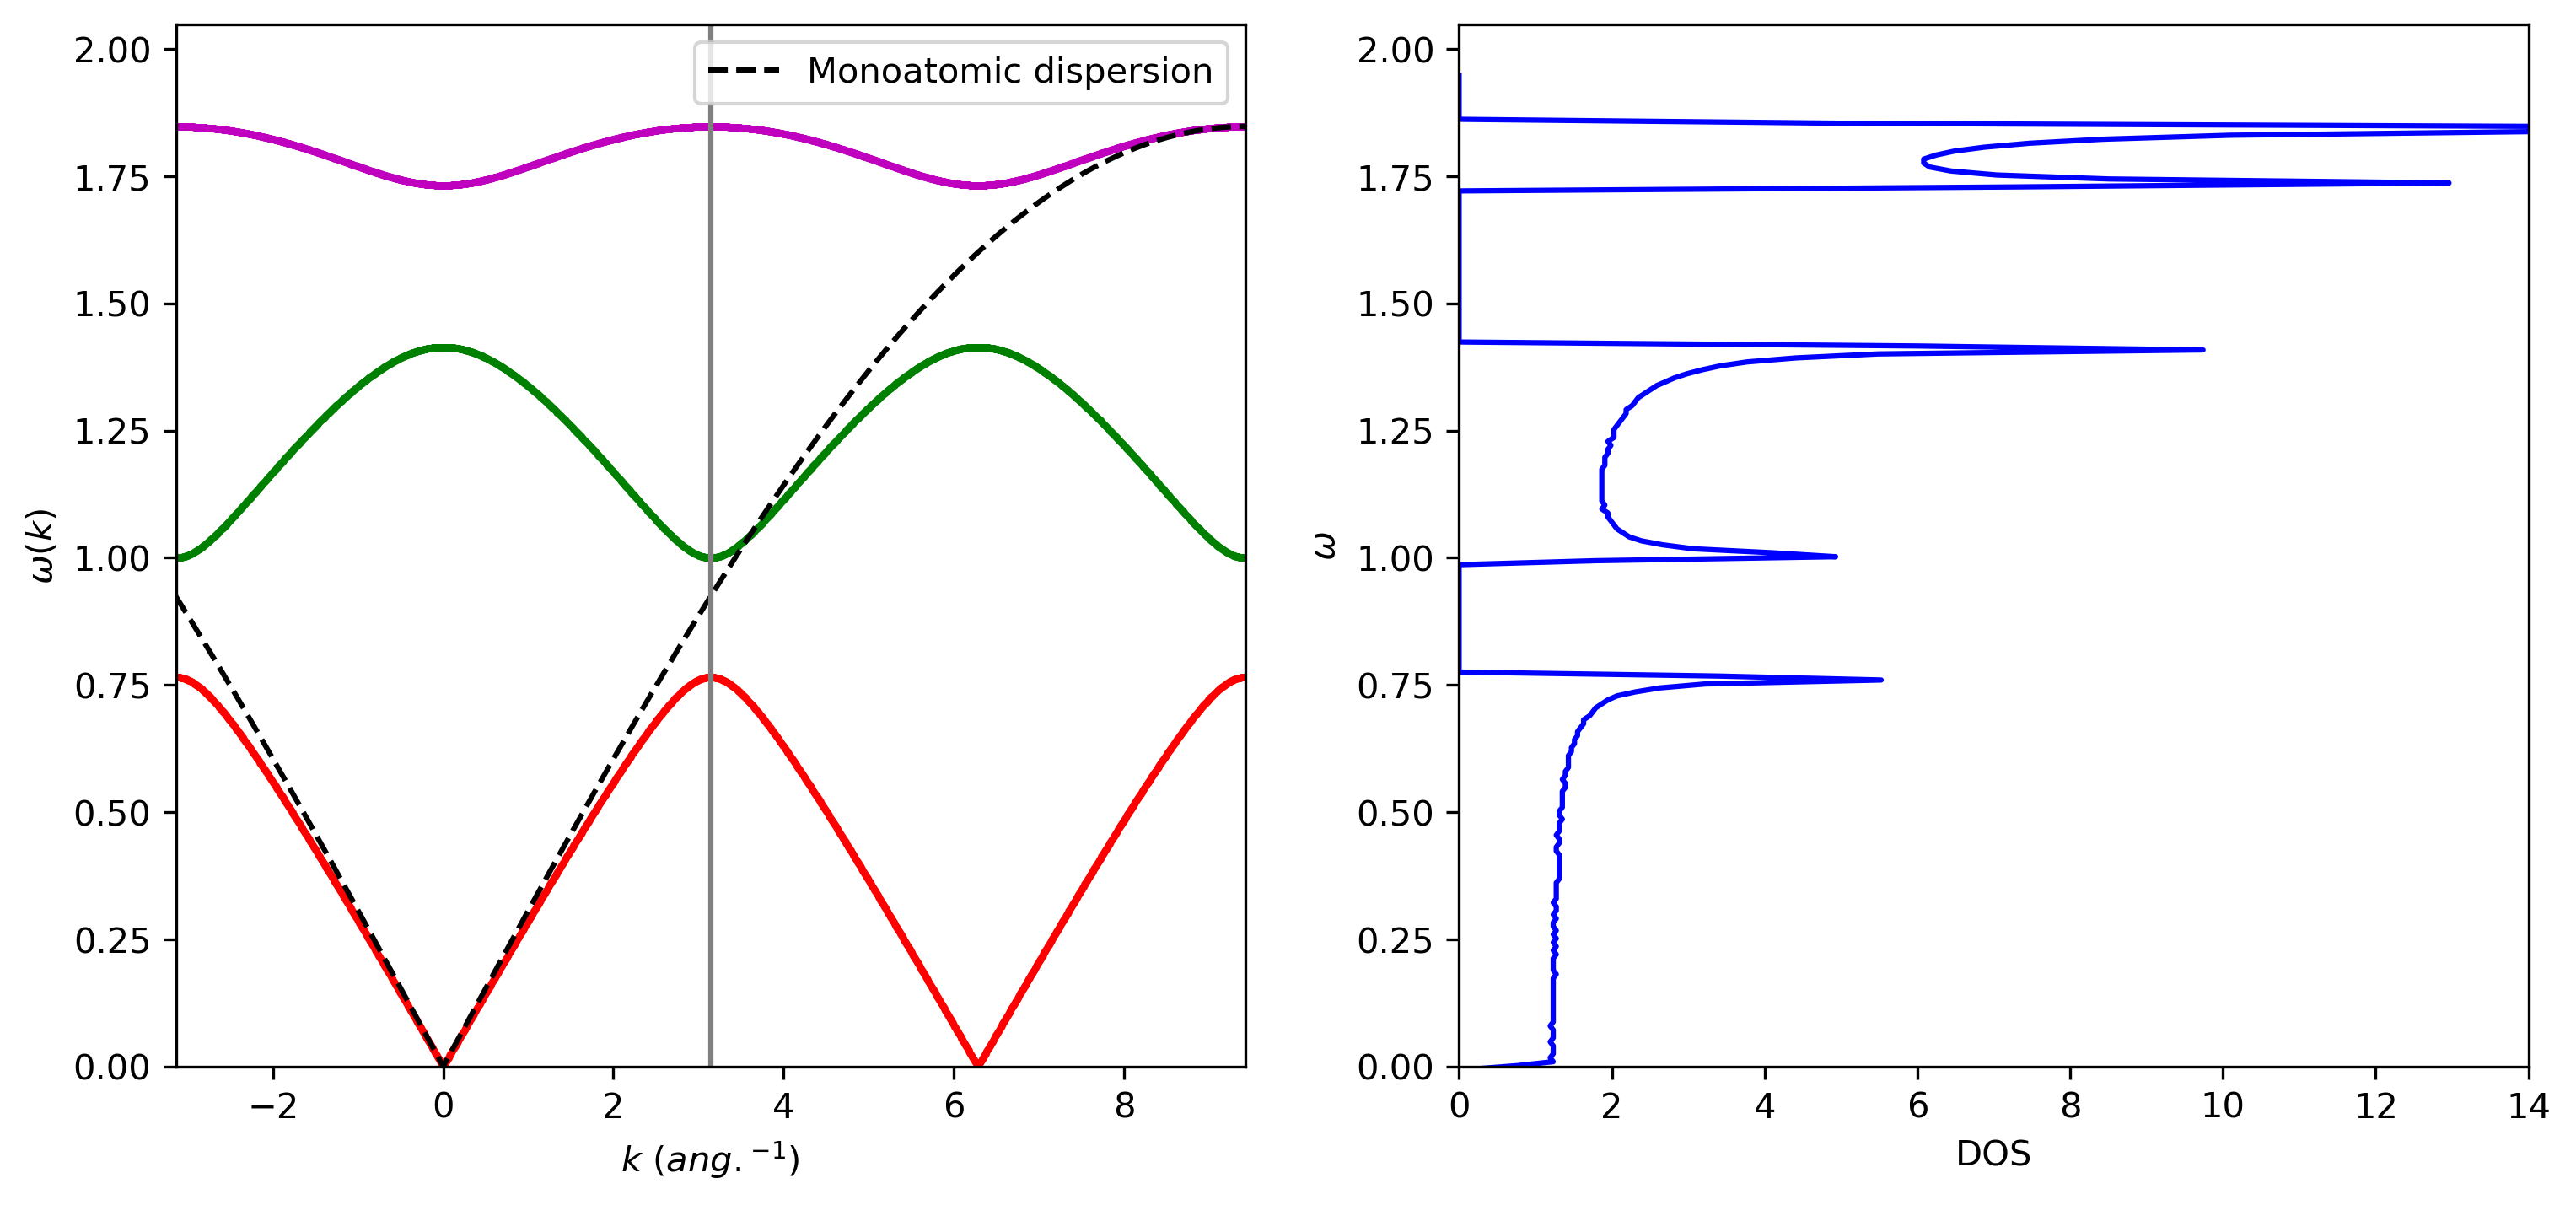

In [40]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize.nonlin import BroydenFirst, KrylovJacobian
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from numpy import linalg as LA
from pylab import *

########################################
#                                      #
#        Part 1: set parameters        #
#                                      #
########################################

M = [1.,1.,2.]
C = [1.,1.,1.]

a = 1. # cell parameter

print ('M = ' + str(M) + '\n' + 'C = ' + str(C) + '\n')

N = len(M) 

########################################
#                                      #
#      Part 2: functions returning     #
#   the dynamical matrix and the DOS   #
#                                      #
########################################

def dyn_mat_3at(k):
    return np.array([[(C[0]+C[2])/np.sqrt(M[0]*M[0]), -C[0]/np.sqrt(M[0]*M[1]), (-1/np.sqrt(M[0]*M[2]))*(C[2]*np.exp(-1.j*k*a))], \
                     [-C[0]/np.sqrt(M[0]*M[1]), (C[0]+C[1])/(np.sqrt(M[1]*M[1])), -C[1]/np.sqrt(M[2]*M[1])] , \
                     [(-1/np.sqrt(M[0]*M[2]))*(C[2]*np.exp(1.j*k*a)), -C[1]/np.sqrt(M[1]*M[2]),(C[1]+C[2])/np.sqrt(M[2]*M[2])]], dtype=complex)

def dos_w(solution,N):
    # For each frequencies w, we integrate the number of state between w-dw and w+dw
    # Only the solution within the Brillouin zone must be provided
    solution_list = list(flatten(solution))

    dw = 7e-3
    nw = int(max(solution_list)/dw)
    w_space = np.linspace(-0.1,max(solution_list)+0.1,nw)
    w_dos = []

    for w in w_space:
        wsum = 0.
        for i in solution_list:
            if i > w-dw and i < w+dw:
                wsum = wsum + 1
        w_dos.append(wsum)      

    # Normalize the DOS so that the integral over the Brillouin zone is N !
    w_sum = sum(w_dos)*dw
    w_dos = w_dos/(w_sum/N)
    w_sum = sum(w_dos)*dw
    return w_space,w_dos, w_sum

print ('Dynamical matrix at Gamma (k = 0):')
print (dyn_mat_3at(0))
print ('\nThe corresponding eigenvalues w^2 are:')
toto = LA.eigh(dyn_mat_3at(0))
print (toto[1])
print ('\n')

########################################
#                                      #
#      Part 3: diagonalizing the       #
#   dynamical matrix on a mesh in      #
#    k-space and computing the DOS     #
#  using the eigenvalues restricted to #
#      the first Brillouin zone        #
#                                      #
########################################

# number of points
nk = 4000

# k points
kmesh = np.linspace(-N*np.pi/a,N*np.pi/a,nk)


eigenvalues = []
kokay = []
for i in range(N):
    eigenvalues.append([])
    kokay.append([])
    
#complex_mat = np.array([1, 2, 3], dtype=complex)s
#print (complex_mat)

for i in range(N):
    for k in kmesh:
        n = LA.eigh(dyn_mat_3at(k))
        if np.real(n[0][i]) > 0:
            eigenvalues[i].append(np.sqrt(np.real(n[0][i])))
            kokay[i].append(k)

# Calculation the DOS

print('Calculating the DOS...')

ibz =   np.linspace(-np.pi/a,np.pi/a,nk)
eigenvalues_ibz = [] 
kokay_ibz = []    # 
for i in range(N):
    eigenvalues_ibz.append([])
    kokay_ibz.append([])

for i in range(N):
    for k in ibz:
        n = LA.eigvalsh(dyn_mat_3at(k))
        n = np.sort(n, axis=None)
        if np.real(n[i]) > 0:  
            eigenvalues_ibz[i].append(np.sqrt(np.real(n[i])))
            kokay_ibz[i].append(k)

max_w = max(list(flatten(eigenvalues_ibz)))

results_dos = [dos_w(eigenvalues_ibz,N)[0],dos_w(eigenvalues_ibz,N)[1],dos_w(eigenvalues_ibz,N)[2]]            

print('Integrated DOS = ' + '%.2f'%(results_dos[2]))
       
########################################
#                                      #
#     Part 4: Plotting the results     #
#                                      #
########################################
    
plt.figure(figsize=(12, 12), dpi=300) 
plt.subplot(2,2,1,adjustable='datalim')

plt.plot(kokay[0],eigenvalues[0],'ro', ms = 1)
plt.plot(kokay[1],eigenvalues[1],'go', ms = 1)
plt.plot(kokay[2],eigenvalues[2],'mo', ms = 1)
plt.plot(kmesh, max_w*abs(np.sin(kmesh*a/(2*N))),'k--', label='Monoatomic dispersion')

plt.xlim(-np.pi,np.pi)
plt.xlabel(r'$k$ $(ang.^{-1})$')
plt.ylabel(r'$\omega (k)$')
plt.ylim(0,max_w+0.2)
plt.xlim(-np.pi/a,3*np.pi/a)
plt.axvline(x=np.pi/a, c='gray')
plt.legend(loc='best')

plt.subplot(2,2,2,adjustable='datalim')
plt.xlabel(r'DOS')
plt.ylabel(r'$\omega$')
plt.ylim(0,max_w+0.2)
plt.xlim(0,14)
#plt.fill_between(w_dos, w_space, w_dos)
plt.plot(results_dos[1],results_dos[0], 'b', ms= 0.5)
plt.savefig("1D_triatomic_chain_vibrations.pdf")

print ('')

## The one-dimensional lattice with  a many atoms unit cell (1st neighbours only)

In the previous scripts, the dynamical matrix has been "hardcoded" within the <code>dyn_mat_2at(k)</code> and <code>dyn_mat_3at(k)</code> function. However, there is a generic formulation for the dynamical matrix, and for a given configuration, it is possible to generate it iteratively. The next script deals with the 1-D lattice with N atoms inside the primitive cell, with interaction limited between first nearest neighbours. Therefore, one must set all the masses $M_i$ and forces constants $C_i$ ($i$ = 1, ..., N) in a Python list to generate the dynamical matrix using the <code>dyn_mat_Nat(k)</code> code.


<code>
factor = 30
if factor %2 > 0:
    factor = factor - 1
C = [4.] * factor
M = [1.] * factor
for i in range(factor):
    if i%2 != 0:
        M[i] = 5.
M[0] = 2.</code>

Moreover, to reduce computation time, we can set the DOS resolution <code>dw = 3e-2</code> and the number of k points to <code>nk = 200</code>

Numbers of atoms and bonds OK !

M = [1.0, 1.0, 1.0, 1.0]
C = [4.0, 4.0, 4.0, 4.0]

Number of atoms: 4


Calculating the DOS...
Integrated DOS = 4.00



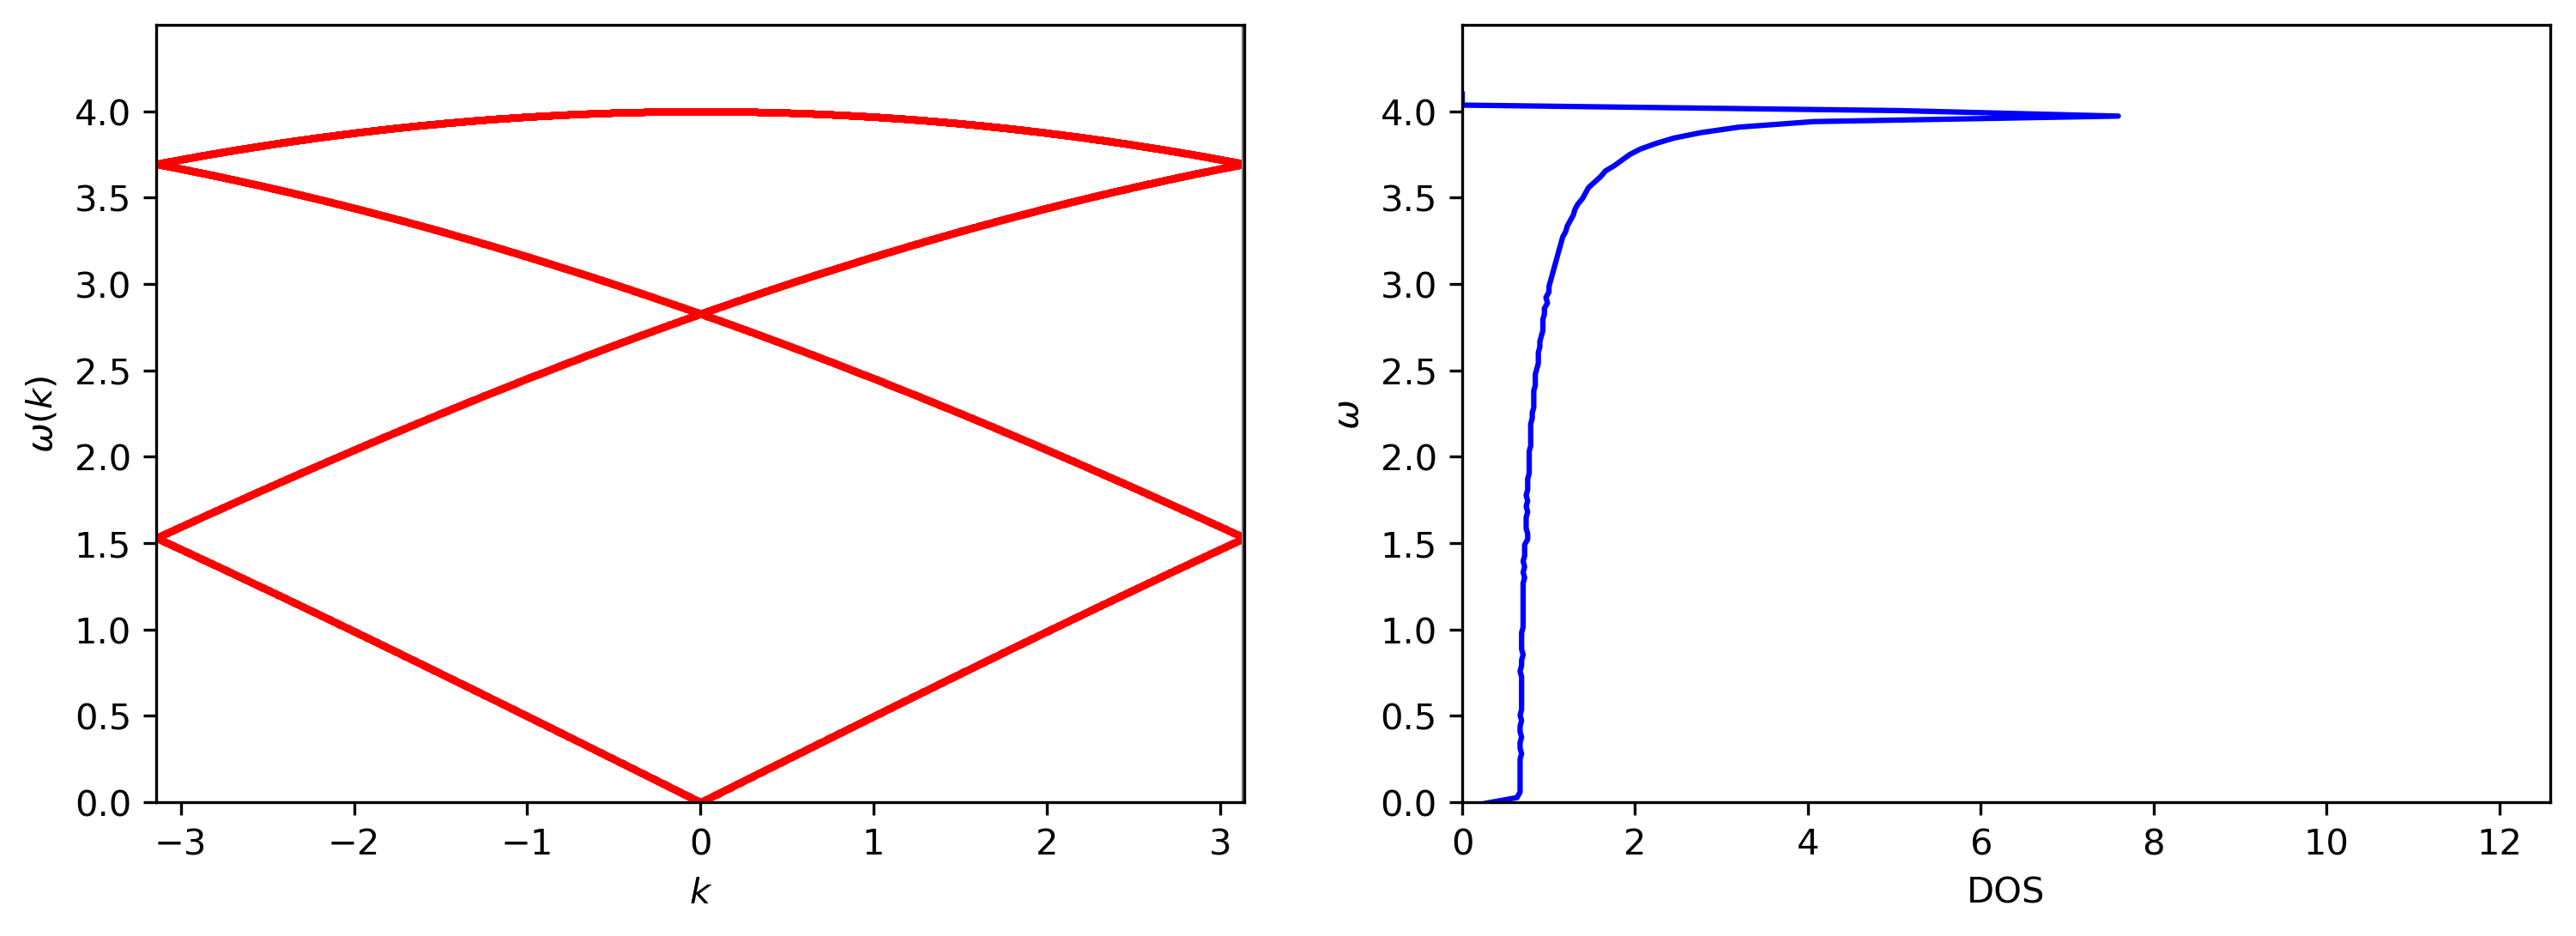

In [45]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize.nonlin import BroydenFirst, KrylovJacobian
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from numpy import linalg as LA
from pylab import *

########################################
#                                      #
#        Part 1: set parameters        #
#                                      #
########################################

factor = 4
if factor %2 > 0:
    factor = factor - 1
C = [4.] * factor
M = [1.] * factor


if (len(M) != len(C)):
    print ('Numbers of atoms and bonds not OK ! \nScript stopped')
    exit()
else:
    print ('Numbers of atoms and bonds OK !\n')

a = 1.0

N = len(M) 

print ('M = ' + str(M) + '\n' + 'C = ' + str(C) + '\n')
print ('Number of atoms: ' + str(N) + '\n')

########################################
#                                      #
#      Part 2: functions returning     #
#   the dynamical matrix and the DOS   #
#                                      #
########################################

def dyn_mat_Nat(k):
    diag_dyn_mat = np.zeros(shape=(N), dtype=float)
    for l in range(N):
        if l == 0:
            diag_dyn_mat[l] = (C[N-1]+C[0])
        else:
            diag_dyn_mat[l] = (C[l]+C[l-1])
            
    matrix = np.zeros(shape=(N,N), dtype=complex)
    for i in range(N):
        for j in range(N):
            sum = 0.
            if i == j:
                sum = diag_dyn_mat[i]
            elif i > j:
                if abs(j-i) == 1:
                    sum = -C[i-1]
                if abs(j-i) == N-1:
                    sum = -C[i]*np.exp(-1.j*k*a)            
            matrix[i,j] = (1/sqrt(M[i]*M[j]))*sum
    for i in range(N):
        for j in range (N):
            if i < j:
                matrix[i,j] = np.conj(matrix[j,i])
    return matrix

def dos_w(solution,N):
    # For each frequencies w, we integrate the number of state between w-dw and w+dw
    # Only the solution within the Brillouin zone must be provided
    solution_list = list(flatten(solution))

    dw = 3e-2
    nw = int(max(solution_list)/dw)
    w_space = np.linspace(-0.1,max(solution_list)+0.1,nw)
    w_dos = []

    for w in w_space:
        wsum = 0.
        for i in solution_list:
            if i > w-dw and i < w+dw:
                wsum = wsum + 1
        w_dos.append(wsum)

    # Normalize the DOS so that the integral over the Brillouin zone is N !
    w_sum = sum(w_dos)*dw
    w_dos = w_dos/(w_sum/N)
    w_sum = sum(w_dos)*dw
    return w_space,w_dos,w_sum


#print (dyn_mat_Nat(0))
print ("")


# Building a N x N matrix:
#matrix = np.zeros(shape=(N,N))
#print (matrix)       

########################################
#                                      #
#      Part 3: diagonalizing the       #
#   dynamical matrix on a mesh in      #
#    k-space and computing the DOS     #
#  using the eigenvalues restricted to #
#      the first Brillouin zone        #
#                                      #
########################################

nk = 2000 # number of points in the reciprocal space

# k points
kmesh = np.linspace(-np.pi,np.pi,nk)

solution = []
kokay = []
for i in range(N):
    solution.append([])
    kokay.append([])

for i in range(N):
    for k in kmesh:
        n = LA.eigvalsh(dyn_mat_Nat(k))
        if np.real(n[i]) > 0:
            solution[i].append(np.sqrt(np.real(n[i])))
            kokay[i].append(k)
            
# Finding max frequency:
solution_list = list(flatten(solution))
max_w = max(solution_list)

# Calculation the DOS

print('Calculating the DOS...')

ibz =   np.linspace(-np.pi/a,np.pi/a,nk)
solution_ibz = [] 
kokay_ibz = []    # 
for i in range(N):
    solution_ibz.append([])
    kokay_ibz.append([])

for i in range(N):
    for k in ibz:
        n = LA.eigvalsh(dyn_mat_Nat(k))
        if np.real(n[i]) > 0:  
            solution_ibz[i].append(np.sqrt(np.real(n[i])))
            kokay_ibz[i].append(k)

results_dos = [dos_w(solution_ibz,N)[0],dos_w(solution_ibz,N)[1], dos_w(solution_ibz,N)[2]]            

print('Integrated DOS = ' + '%.2f'%(results_dos[2]))

########################################
#                                      #
#     Part 4: Plotting the results     #
#                                      #
########################################

plt.figure(figsize=(12, 4), dpi=300) 
plt.subplot(1,2,1,adjustable='datalim')
for i in range(N):
    plt.plot(kokay[i],solution[i],'ro',ms=1.)
    
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega (k)$')
plt.xlim(-np.pi/a,np.pi/a)
plt.axvline(x=np.pi/a, c='gray')
plt.ylim(0,max_w+0.5)

plt.subplot(1,2,2,adjustable='datalim')
plt.xlabel(r'DOS')
plt.ylabel(r'$\omega$')
plt.ylim(0,max_w+0.5)
plt.xlim(0,max(results_dos[1])+5)
plt.plot(results_dos[1],results_dos[0], 'b', ms= 0.5)

print ('')

## Dispersion curves for aluminium (fcc lattice)

In this exercice, we start with a real material, aluminium, which crystallizes as a ${fcc}$ lattice. 
In the previous exercices, we established for models compounds the dispersion curves based on the atomic masses and the interatomic force constants. Another possibility is to calculate the force constants from an appropriate theoretical framework.

In the following, the force constants of $fcc$-Al are calculated through effective medium theory (EMT), and you can tune the lattice parameter $a$. Depending on the volume of the unit cell, imaginary frequencies may appear. What is the interval of volumes for which $fcc$-Al is dynamically stable within EMT ?

In [1]:
from ase.build import bulk
from ase.calculators.emt import EMT
from ase.phonons import Phonons
from ipywidgets import FloatSlider, IntSlider, interact, interact_manual, fixed

def calculate_phonons(x):
    # Setup crystal and EMT calculator
    atoms = bulk('Al', 'fcc', a=x)#4.05)

    # Phonon calculator
    N = 7
    ph = Phonons(atoms, EMT(), supercell=(N, N, N), delta=0.05)
    ph.run()

    # Read forces and assemble the dynamical matrix
    ph.read(acoustic=True)
    ph.clean()

    path = atoms.cell.bandpath('GXULGK', npoints=100)
    bs = ph.get_band_structure(path)

    dos = ph.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)
    
    forces = ph.get_force_constant()
    print (forces)

    # Plot the band structure and DOS:
    import matplotlib.pyplot as plt
    fig = plt.figure(1, figsize=(8, 4), dpi=300)
    ax = fig.add_axes([.12, .07, .67, .85])

    emax = 0.035
    
    bs.plot(ax=ax, emin=-0.01, emax=emax)

    dosax = fig.add_axes([.8, .07, .17, .85])
    dosax.fill_between(dos.weights[0], dos.energy, y2=0, color='grey',
                       edgecolor='k', lw=1)

    dosax.set_ylim(-0.01, emax)
    dosax.set_yticks([])
    dosax.set_xticks([])
    dosax.set_xlabel("DOS", fontsize=18)

    fig.savefig('Al_phonon.png')
    return

interact_manual(calculate_phonons, x=FloatSlider(value=4.05, min=0, max=10, description='a (Angstrom)'));
    


interactive(children=(FloatSlider(value=4.05, description='a (Angstrom)', max=10.0), Button(description='Run I…

#### Phonons using Density Functional Theory

Nanana

In [2]:
from gpaw import GPAW, PW
from ase import Atoms
from phonopy import Phonopy
from phonopy.structure.atoms import PhonopyAtoms
import numpy as np

def get_gpaw(kpts_size=None):
    if kpts_size is None:
        calc = GPAW(mode=PW(300),
                    kpts={'size': (2, 2, 2)})
    else:
        calc = GPAW(mode=PW(300),
                    kpts={'size': kpts_size})
    return calc

def get_crystal():
    a = 5.404
    cell = PhonopyAtoms(symbols=(['Si'] * 8),
                        cell=np.diag((a, a, a)),
                        scaled_positions=[(0, 0, 0),
                                          (0, 0.5, 0.5),
                                          (0.5, 0, 0.5),
                                          (0.5, 0.5, 0),
                                          (0.25, 0.25, 0.25),
                                          (0.25, 0.75, 0.75),
                                          (0.75, 0.25, 0.75),
                                          (0.75, 0.75, 0.25)])
    return cell

def phonopy_pre_process(cell, supercell_matrix=None):

    if supercell_matrix is None:
        smat = [[2,0,0], [0,2,0], [0,0,2]],
    else:
        smat = supercell_matrix
    phonon = Phonopy(cell,
                     smat,
                     primitive_matrix=[[0, 0.5, 0.5],
                                       [0.5, 0, 0.5],
                                       [0.5, 0.5, 0]])
    phonon.generate_displacements(distance=0.03)
    print("[Phonopy] Atomic displacements:")
    disps = phonon.get_displacements()
    for d in disps:
        print("[Phonopy] %d %s" % (d[0], d[1:]))
    return phonon

def run_gpaw(calc, phonon):
    supercells = phonon.get_supercells_with_displacements()
    # Force calculations by calculator
    set_of_forces = []
    for scell in supercells:
        cell = Atoms(symbols=scell.get_chemical_symbols(),
                     scaled_positions=scell.get_scaled_positions(),
                     cell=scell.get_cell(),
                     pbc=True)
        cell.set_calculator(calc)
        forces = cell.get_forces()
        drift_force = forces.sum(axis=0)
        print(("[Phonopy] Drift force:" + "%11.5f" * 3) % tuple(drift_force))
        # Simple translational invariance
        for force in forces:
            force -= drift_force / forces.shape[0]
        set_of_forces.append(forces)
    return set_of_forces

def phonopy_post_process(phonon, set_of_forces):
    phonon.produce_force_constants(forces=set_of_forces)
    print('')
    print("[Phonopy] Phonon frequencies at Gamma:")
    for i, freq in enumerate(phonon.get_frequencies((0, 0, 0))):
        print("[Phonopy] %3d: %10.5f THz" %  (i + 1, freq)) # THz
    
    # DOS
    phonon.set_mesh([21, 21, 21])
    phonon.set_total_DOS(tetrahedron_method=True)
    print('')
    print("[Phonopy] Phonon DOS:")
    for omega, dos in np.array(phonon.get_total_DOS()).T:
        print("%15.7f%15.7f" % (omega, dos))

def main():
    cell = get_crystal()

    # 1x1x1 supercell of conventional unit cell
    calc = get_gpaw(kpts_size=(4, 4, 4))
    phonon = phonopy_pre_process(cell, supercell_matrix=np.eye(3, dtype='intc'))

    # # 2x2x2 supercell of conventional unit cell
    # calc = get_gpaw(kpts_size=(2, 2, 2))
    # phonon = phonopy_pre_process(cell,
    #                              supercell_matrix=(np.eye(3, dtype='intc') * 2))

    set_of_forces = run_gpaw(calc, phonon)
    phonopy_post_process(phonon, set_of_forces)

if __name__ == "__main__":
    main()


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  19.8.1
 |___|_|             

User:   slemal@slemal-ULg
Date:   Wed Feb 12 09:54:34 2020
Arch:   x86_64
Pid:    17643
Python: 3.7.5
gpaw:   /home/slemal/anaconda3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/slemal/anaconda3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/slemal/.local/lib/python3.7/site-packages/ase (version 3.19.0)
numpy:  /home/slemal/anaconda3/lib/python3.7/site-packages/numpy (version 1.17.4)
scipy:  /home/slemal/anaconda3/lib/python3.7/site-packages/scipy (version 1.3.2)
libxc:  3.0.0
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: {size: (4, 4, 4)}
  mode: {ecut: 300.0,
         gammacentered: False,
         name: pw}

[Phonopy] Atomic displacements:
[Phonopy] 0 [0.029999999999999995, 0.0, 0.0]
System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Si-setup:
  name: Silicon
  


[Phonopy] Phonon DOS:
     -1.5356885      0.0000000
     -1.4435471      0.0000000
     -1.3514058      0.0000000
     -1.2592645      0.0000000
     -1.1671232      0.0000000
     -1.0749819      0.0000000
     -0.9828406      0.0000000
     -0.8906992      0.0000000
     -0.7985579      0.0000000
     -0.7064166      0.0000000
     -0.6142753      0.0000000
     -0.5221340      0.0000000
     -0.4299927      0.0000000
     -0.3378514      0.0000000
     -0.2457100      0.0000000
     -0.1535687      0.0000000
     -0.0614274      0.0000000
      0.0307139      0.0000140
      0.1228552      0.0002243
      0.2149965      0.0006871
      0.3071379      0.0014022
      0.3992792      0.0023697
      0.4914205      0.0035896
      0.5835618      0.0093827
      0.6757031      0.0118422
      0.7678444      0.0137609
      0.8599858      0.0170343
      0.9521271      0.0218936
      1.0442684      0.0276620
      1.1364097      0.0324758
      1.2285510      0.0371674
      1.3206923 

In [46]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()

#import json
#s = json.load( open("bmh_matplotlibrc.json") )  #edit path to json file
#matplotlib.rcParams.update(s)

2 atoms in the cell -> 2 bands along k.

Dynamical matrix at Gamma (k = 0):
[[ 6.+0.j -6.+0.j]
 [-6.+0.j  6.+0.j]]

The corresponding eigenvalues w^2 are:
[ 0. 12.]

The corresponding eigenvectors are:
[[-0.70710678-0.j -0.70710678+0.j]
 [-0.70710678-0.j  0.70710678+0.j]]


Calculating the DOS...
Integrated DOS = 2.00



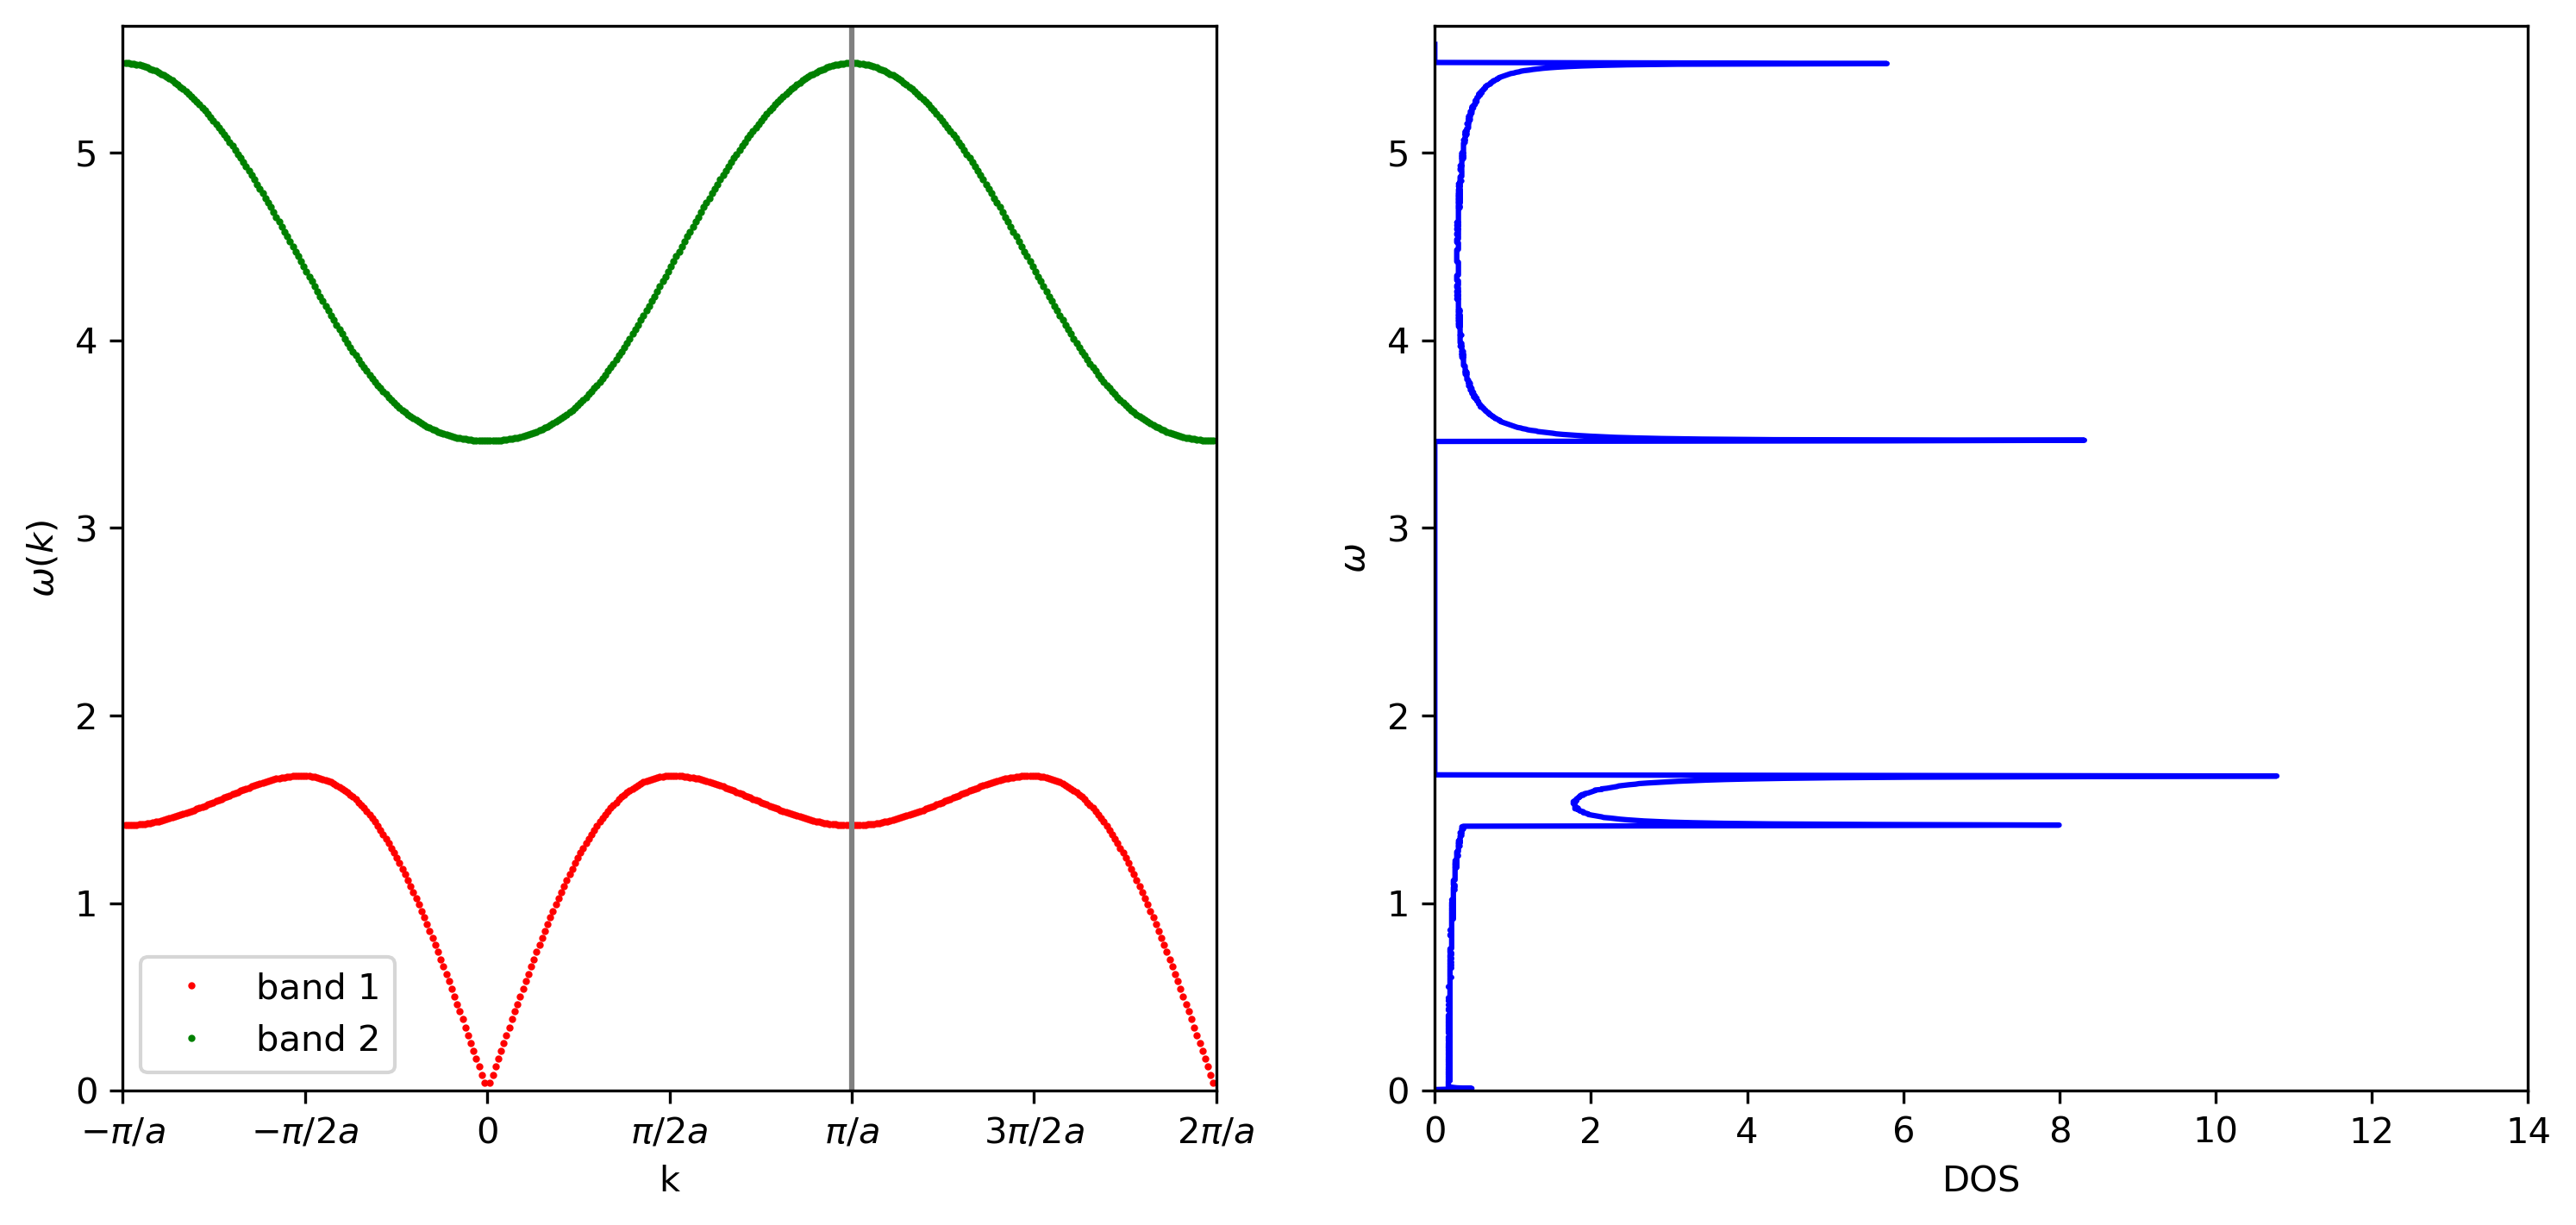

In [36]:
%run diatomic_chain_2NN.py